 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 02 - Regression : </b> Welcome to the programming assignment (PA) on regression. This programing assignment focuses on understanding the basic concepts of linear regression.


<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.
4. For each question, report your understanding and the corresponding outcomes. Answers without proper observations will not be awarded marks.
5. Writing the code alone, without executing it, will result in zero marks.




<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$. Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set, with each set containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0} + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center>

Use the estimated parameter vector $\textbf{w}$, to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

<b> Part - (3) : Understanding the choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations.

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints (low,middle and high)
2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
2. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
3. Using the six plots above, describe the bias-variance trade-off.


(b). Report all your observations







<b> Part - (6) : Understanding
Maximum a Posteriori (MAP) estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

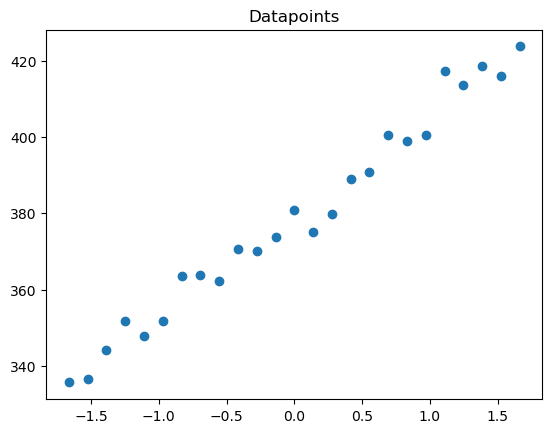

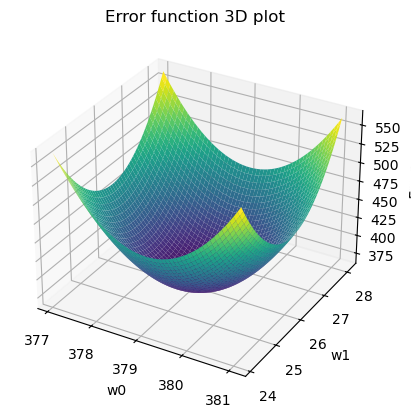

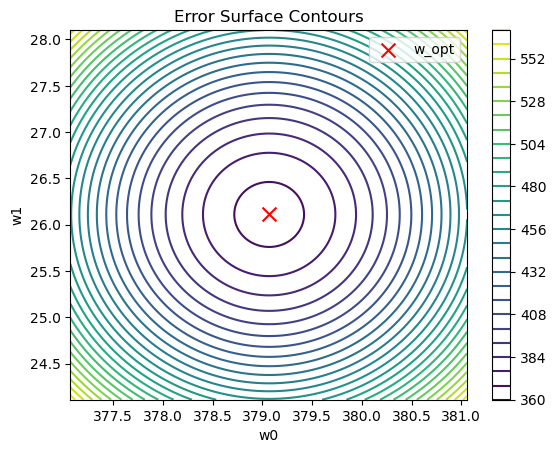

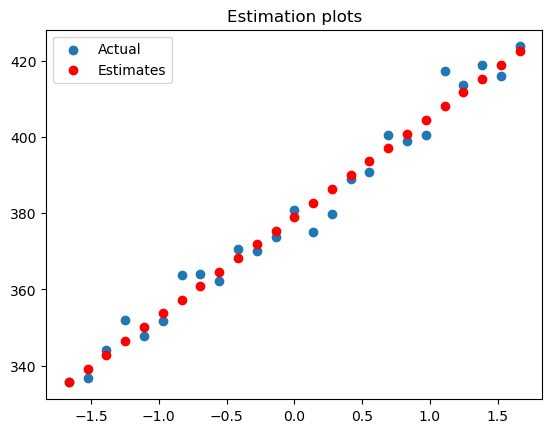

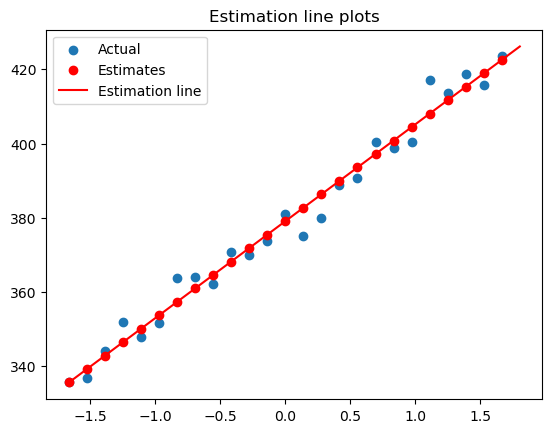

Least Sqaures weights -> [379.0687697319429, 26.11122023486234]
Gradient Descent weights -> [379.06876125909565, 26.111219845774812]
Difference in weights -> [8.472847241591808e-06, 3.890875284184858e-07]


In [17]:
#Understanding Error Surface
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

np.random.seed(42)

########################################
#Generate meaningful data
########################################
npoints = 25
initial = 115
mean = np.zeros((npoints,))

x = np.arange(initial, initial + npoints)
x_mean, x_std = np.mean(x), np.std(x)
cov  = 20*np.eye(npoints, dtype=int)

noise = np.random.multivariate_normal(mean, cov)
t = 3.86*x - 110.42 + noise

# normalizing data so that the bias w_0 multiplied by 0
# actually makes a dent
x = (x - x_mean) / x_std

########################################
#Plot scatter plot of data
########################################
plt.scatter(x, t)
plt.title("Datapoints")
plt.show()

########################################
#Weight estimation through error surface, i.e., empirically locate the minima of error surface
########################################
#Sample a bunch of w's around w_opt and compute the associated error
def LinearRegression(x,t): #inputs : 1)input data i.e (x). 2)target i.e (t)
    X = np.column_stack((np.ones(x.size), x))
    T = t.reshape(-1, 1)
    w_opt = np.linalg.inv(X.T @ X) @ X.T @ T
    return w_opt

w_opt = LinearRegression(x, t)
step = 1e-2
margin = 2.0

w0_range = np.arange(w_opt[0,0] - margin, w_opt[0,0] + margin, step)
w1_range = np.arange(w_opt[1,0] - margin, w_opt[1,0] + margin, step)

#Compute the error
def Error(w,t,x): #inputs : 1)weight 2)data i.e (t,x)
    #Estimate the target
    X = np.column_stack((np.ones(x.size), x))
    T = t.reshape(-1, 1)
    Y = X @ w

    #Compute and return the error
    error = np.sum((Y - T)**2)
    return error


#Plot 3D error surface and the corresponding contour plots
#Error surface is a function of w0 and w1
W0, W1 = np.meshgrid(w0_range, w1_range)
W = np.stack((W0, W1), axis=-1)
Z = np.zeros(W.shape[:2])

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = Error(W[i, j].reshape(-1, 1), t, x)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, Z, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Error')
plt.title("Error function 3D plot")
plt.show()

plt.figure()
cp = plt.contour(W0, W1, Z, levels=30, cmap='viridis')
plt.colorbar(cp)
plt.scatter(w_opt[0,0], w_opt[1,0], color='red', marker='x', s=100, label='w_opt')

plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Error Surface Contours')
plt.legend()
plt.show()

#Locate the minima of the error surface
def gradient_error_func(w, x, t):
    X = np.column_stack((np.ones(x.size), x))
    T = t.reshape(-1, 1)
    w = w.reshape(-1, 1)

    gradient = 2*(X.T) @ (X @ w - T)
    return gradient

def GradientDescent(w_init, gradient, learning_rate=0.01, iters=10):
    w = w_init

    for i in range(iters):
        w = w - learning_rate * gradient(w)

    return w

learning_rate = 0.01
iters = 25
w_init = np.array([w_opt[0, 0]/4, w_opt[1, 0]/2]).reshape(-1, 1)
w_opt_gd = GradientDescent(w_init, lambda w: gradient_error_func(w, x, t), learning_rate, iters)

########################################
#Least squares approach to estimate the weights
########################################
#Complete the below linear regression function
# defined earlier

#Estimate optimal weight's using "LinearRegression" function
# done earlier


#Estimate the targets using the input x and the estimated weights
plt.scatter(x, t, label="Actual")
plt.scatter(x, w_opt[0, 0] + w_opt[1, 0]*x, color="r", label="Estimates")
plt.title("Estimation plots")
plt.legend()
plt.show()


#Plot the estimated line on top of the above scatter plot
x_plot = (np.arange(initial, initial + npoints + step, step) - x_mean)/x_std
plt.scatter(x, t, label="Actual")
plt.scatter(x, w_opt[0, 0] + w_opt[1, 0]*x, color="r", label="Estimates")
plt.plot(x_plot, w_opt[0, 0] + w_opt[1, 0]*x_plot, color="r", label="Estimation line")
plt.title("Estimation line plots")
plt.legend()
plt.show()


########################################
#Compare the estimated weight's using least squares approach with the error surface approach
########################################
print(f"Least Sqaures weights -> [{w_opt[0, 0]}, {w_opt[1, 0]}]")
print(f"Gradient Descent weights -> [{w_opt_gd[0, 0]}, {w_opt_gd[1, 0]}]")

w_diff = w_opt - w_opt_gd
print(f"Difference in weights -> [{w_diff[0, 0]}, {w_diff[1, 0]}]")


<b> Report your observations </b>

1. When we don't normalize the data (x), the error surface comes out to be a stretched parabola instead of a bowl. This is because estimation by linear regression yields $y = w_0 + w_1 x$ and with denormalized $x$, the $w_0$ does not even matter and hence we get a distorted error surface. Error surface is a convex bowl like with a single minima on $w_{opt}$.

2. $w_{opt}$ is found for normalized data $x$ using least squares approach ($w_{opt} = (X^T X)^{-1} X^T t$, where $X$ is augmented with $1$ with normalized $x$) and hence does not match the original line equation weights. Plotting the line with $w_{opt}$ as weights, it estimated the target pretty decently by a line.

3. Gradient descent is employed to numerically find the optimal $w$ ($\nabla_{w} J(w) = 2X^T(Xw - t)$) with learning rate $\eta = 0.01$ and 25 iterations.
   
Least Sqaures weights -> [379.0687697319429, 26.11122023486234]

Gradient Descent weights -> [379.06876125909565, 26.111219845774812]

Difference in weights -> [8.472847241591808e-06, 3.890875284184858e-07]



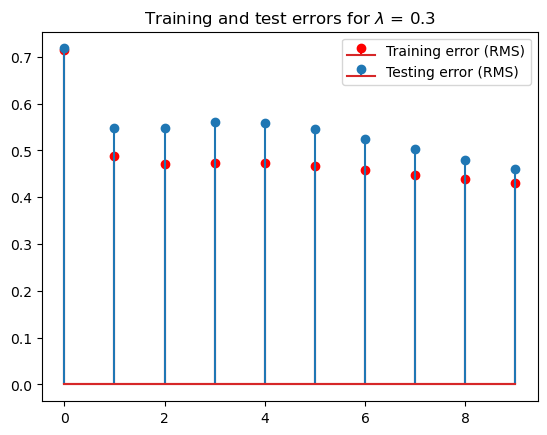

In [50]:
#Understanding model order and overfitting
########################################
#Generate 20 data points
########################################
np.random.seed(42)

x = np.linspace(0, 1, 20)
np.random.shuffle(x)
cov = 0.1
e = np.random.normal(0, cov, size=x.size)
t = np.sin(2*np.pi*x) + e

#Obtain train and test splits
train_x = x[:10]
test_x = x[10:]

train_t = t[:10]
test_t = t[10:]

########################################
#Fitting Mth degree polynomial using least squares approach
########################################
def poly_kernel(X, M): #(data, model order)
    phi = np.zeros((X.size, M + 1))

    for i in range(X.size):
        for j in range(M + 1):
            phi[i, j] = X[i]**j

    return phi

def vectorize(x):
    return x.reshape(-1, 1)

#Complete the function
def PolynomialFit(X_train,Y_train,M,lamda): #(training data, trining targets, Model order, Regularization coefficient)
    #Transform the data using polynomial kernel
    Phi_train = poly_kernel(X_train, M)

    #Find Pseudo inverse solution
    w_opt = np.linalg.inv(Phi_train.T @ Phi_train + lamda * np.eye(Phi_train.shape[1])) @ Phi_train.T @ Y_train

    #return the weight vector
    return w_opt

#Complete the function
def PolynomialPred(w_est,X_train,X_test): #(weight,training data, testing data, training targets, testing targets)
    #Estimate the targets for both training and testing data
    Y_train = X_train @ w_est
    Y_test = X_test @ w_est

    #Return training and testing predictions
    return Y_train, Y_test

#Complete the function
def PolynomialPred_Error(w_est,X_train,X_test,Y_train,Y_test): #(weight,training data, testing data, training targets, testing targets)
    #Estimate the targets for both training and testing data
    Y_pred_train, Y_pred_test = PolynomialPred(w_est, X_train, X_test)
    TrainError = Y_train - Y_pred_train
    TestError = Y_test - Y_pred_test

    #Return training and testing error
    return TrainError,TestError

#Iterate through range of M values
M_range = list(range(10))
TrError = np.zeros(len(M_range))
TeError = np.zeros(len(M_range))

lamda = 0.3
X_train, X_test = train_x, test_x
Y_train, Y_test = vectorize(train_t), vectorize(test_t)

for i, M in enumerate(M_range):
    #Fit Mth order polynomial i.e estimate optimal w. Use the function "PolynomialFit"
    w_est = PolynomialFit(X_train, Y_train, M, lamda)

    #Predict training and testing targets
    #Predict errors on both training and testing data using estimated w. Use the function "PolynomialPred_Error"
    TrainError, TestError = PolynomialPred_Error(w_est, poly_kernel(X_train, M), poly_kernel(X_test, M), Y_train, Y_test)

    #Store them for plotting
    TrError[i] = np.sqrt(np.mean(TrainError**2))
    TeError[i] = np.sqrt(np.mean(TestError**2))


#Plot training and testing estimates alogwith the original targets
plt.figure()
plt.stem(M_range, TrError, "r", label="Training error (RMS)")
plt.stem(M_range, TeError, label="Testing error (RMS)")
plt.title(f"Training and test errors for $\\lambda$ = {lamda}")
plt.legend()
plt.show()


#Plot training error vs polynomial order, and testing error vs polynomial order



########################################
#Increase the size of training data set to 100 points and repeat the experiments
########################################





########################################
#Effect of regularization
########################################
#Consider a set of lambda's. For example: lamdas = [0, 1e-7 , 1e-4, 1e-2, 1]
#Repeat the experiments, i.e., plot the prediction and error in predictions with respect to model order. Contrast these results with those obtained without regularization.





########################################
#Effect of bias regularization
########################################
#Modify the function i.e include bias
#Generate data



#Estimate the polynomial with and without regularization constraint



#Compare the two estimated polynomials and report the observations



<b> Report your observations </b>

1.

2.

3.



In [ ]:
#Understanding the choice of kernel
########################################
#Generate 100 data points
########################################



#Obtian train and test splits
#Take even samples for training and odd samples for testing



#Function to estimate the parameters
def KernelRegressionFit(X_train,Y_train,kernelType,M,lamda): #(training data, training targets, type of kernel, regularization coefficient)
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    #print(X_train.shape)
    #X_train = np.reshape(X_train, (1,-1))
    #Y_train = np.reshape(Y_train, (1,-1))
    X = []
    if kernelType=='polynomial':
      #Use polynomial kernel to transform the data

    if kernelType=='gaussian':
      #Use Gaussian kernel to transform the data

    if kernelType=='sigmoidal':
      #Use Sigmoid kernel to transform the data

    #Estimate weights using Pseudo iverse solution


    #Return the estimated weights
    return w_opt

#Function to compute the training and testing errors from the current weight estimates
def KernelRegressionPred_Error(w_est,X_train,Y_train,X_test,Y_test,kernelType):
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    X_tr = []
    X_te = []
    #X_train = np.reshape(X_train, (1,-1))
    #Y_train = np.reshape(Y_train, (1,-1))
    #X_test = np.reshape(X_test, (1,-1))
    #Y_test = np.reshape(Y_test, (1,-1))
    M = len(w_est)-1
    if kernelType=='polynomial':
      #Use polynomial kernel to transform the data

    if kernelType=='gaussian':
      #Use Gaussian kernel to transform the data

    if kernelType=='sigmoidal':
      #Use Sigmoid kernel to transform the data


    #Estimate training and testing targets


    #Compute and return the training and testing errors
    return TrainError,TestError


#Iterate through range of M values
M_range=list(range(10))

polynomial_tr_error = []
polynomial_te_error = []
gaussian_tr_error = []
gaussian_te_error = []
sigmoid_tr_error = []
sigmoid_te_error = []

for M in M_range:
    #Fit Mth order polynomial using three kernels i.e {Polynomial,Gaussian,Sigmoid}



    #Predict training and testing targets using estimated w


    #Predict errors on both training and testing data using estimated w



    #Store them for plotting


#Plot the predicted training and testing targets alongside the original targets for various model orders and all three different kernels.




#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels




########################################
#Repeat the experiments by changing target function
########################################



















<b> Report your observations </b>

1.

2.

3.



In [ ]:
#Understanding online training
########################################
#Repeat 3(a) and 3(b) using stochastic gradient descent for weight update ( plot required results )
########################################

def ErrorPred(w_est,X_train,Y_train,X_test,Y_test,kernelType): #(estimated weight, training data, training targets, testing data, testing targets, type of the kernel )
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    X_tr = []
    X_te = []
    M = len(w_est)-1
    if kernelType=='polynomial':
      #Use polynomial kernel to transform the data

    if kernelType=='gaussian':
      #Use Gaussian kernel to transofrm the data

    if kernelType=='sigmoidal':
      #Use sigmoidal kernel to transform the data

    #Compute and return the train and test errors
    return TrainError, TestError


def OnlineTraining(X_train,Y_train,X_test, Y_test, kernelType,M,Epochs,BatchSize,stepSize): #(training data, training targets, testing data, testing targets, tupe of the kernel, order of the mode, Number of epochs, Batch size, Step size)
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    #Initialize the weights


    #Initialize the necessary variables
    #Iterate through epochs

    epochs = range(Epochs)
    for epoch in epochs:
        #Compute the train and test errors using the current weights
        tr_err, te_err = ErrorPred(weights, X_train, Y_train, X_test, Y_test, kernelType)
        #Store training and testing errors for plotting

        #Shuffle the data

        #Iterate through the batches
        for batch in range(batches):
            #Initialize the necessary variables
            #Get a batch of data

            #Iterate through the data points of obtained batch
            for n in range(len(data_b)):
                #Obtain kernel representation
                X_tr = []
                if kernelType=='polynomial':

                if kernelType=='gaussian':

                if kernelType=='sigmoidal':

                #Compute the gradient of weight's

                #Compute the running mean of the weights gradients for the batch update

            #Update the weights using mean gradient, consider using reasonable stepSize

    #Plot training and testing error across the epochs


    #Return the estimated weights
    return weights

def OnlinePred(w_est,X_train,X_test,kernelType): #(estimated weights, training data, testing data, type of the kernel )
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    #Initialize the required variables

    #Obtain kernel representations
    if kernelType=='polynomial':

    if kernelType=='gaussian':

    if kernelType=='sigmoidal':

    #Compute and return the training and testing target estimates
    return Y_tr_error,Y_te_error

def OnlinePred_Error(w_est,X_train,Y_train,X_test,Y_test,kernelType): #(estimated weights, training data, training targets, testing data, testing targets, type of the kernel )
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    #Initialize the required variables

    #Obtain kernel representations
    if kernelType=='polynomial':

    if kernelType=='gaussian':

    if kernelType=='sigmoidal':

    #Compute and return the training and testing errors
    return Y_tr_error,Y_te_error


##################################################
#Repeat 3a with online training
##################################################




##################################################
#Repeat 3b with online training
##################################################




########################################
#Study the effect of stepSize on the convergence of weights ( plot required results )
########################################




########################################
#Study the effect of batchsize on the speed of convergence ( plot required results )
########################################






<b> Report your observations </b>

1.

2.

3.



In [ ]:
#Understanding the bias-variance trade-off
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################




########################################
#Use regularized least squares to estimate w
########################################




########################################
#Illustrate the concept of Bias-Variance trade off
########################################
#1. Chose three different regularization coefficeints (low,middle and high)
#2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
#3. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
#4. Using the six plots above, describe the bias-variance trade-off.






<b> Report your observations </b>

1.

2.

3.



In [ ]:
#Understanding MAP estimate
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################



########################################
#Update the statistics of posterior density
########################################
#Initialie the parameters for standard normal prior


#Iterate through the data points and update the stats of posterior density





########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################





########################################
#Predictive distribution analysis
########################################
#Predictive distribution analysis through sampling
#Iterate through data points and sample weight vectors when partial data points are seen, and plot the curves





#Predictive distribution analysis through variance
#Iterate through data points and obtain necessary plots as discussed in the class






<b> Report your observations </b>

1.

2.

3.

